<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Visualizing and tuning CARTs


---

Using the admissions data from earlier in the course, build CARTs, look at how they work visually, and compare their performance to other models.

### 1. Install and load the packages required to visually show decision tree branching

You will need to first:

1. Install `graphviz` with homebrew (on OSX). The command will be `brew install graphviz`
- Install `pydotplus` with `conda install -c anaconda pydotplus`
- Load the packages as shown below (you may need to restart the kernel after the installations.)

In [1]:
# REQUIREMENTS:
# conda install -c anaconda pydotplus
# brew install graphviz

### 2. Load in admissions data and other python packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
admit = pd.read_csv('../../../../resource-datasets/admissions/admissions.csv')

### 3. Create regression and classification X, y data

The regression data will be:

    Xr = [admit, gre, prestige]
    yr = gpa
    
The classification data will be:

    Xc = [gre, gpa, prestige]
    yc = admit

In [5]:
admit.head()

admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0

In [23]:
admit.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

In [22]:
admit.dropna(inplace=True)

In [24]:
Xr = admit[["admit", "gre", "prestige"]]
yr = admit["gpa"]

In [42]:
Xc = admit[["gre", 'gpa', 'prestige']]
yc = admit["admit"]

In [43]:
# tips_temp = pd.get_dummies(tips,columns=[‘sex’,”smoker"])
Xc = pd.get_dummies(Xc,columns=['prestige'], drop_first=True)

In [45]:
Xc.head()

gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0
0  380.0  3.61             0             1             0
1  660.0  3.67             0             1             0
2  800.0  4.00             0             0             0
3  640.0  3.19             0             0             1
4  520.0  2.93             0             0             1

### 4. Cross-validate linear regression and logistic regression on the data

Fit a linear regression for the regression problem and a logistic regression for the classification problem. Cross-validate the R2 and accuracy scores.

In [46]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split




In [48]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    Xr, yr, test_size=0.2, random_state=1)

In [49]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    Xc, yc, test_size=0.2, stratify=yc, random_state=1)

In [50]:
model = LinearRegression()
lr = LogisticRegression()

In [56]:
model.fit(Xr_train, yr_train)
lr.fit(Xc_train, yc_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [57]:
print(model.score(Xr_train, yr_train))
print(cross_val_score(model, Xr_train, yr_train, cv=5).mean())
print(model.score(Xr_test, yr_test))


0.16835956248976836
0.1330935259823774
0.11126120954230456


In [58]:
print(lr.score(Xc_train, yc_train))
print(cross_val_score(lr, Xc_train, yc_train, cv=5).mean())
print(lr.score(Xc_test, yc_test))


0.7129337539432177
0.7097924297924297
0.725


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [54]:
# Perform 5-fold cross validation
scores = cross_val_score(model, Xr_train, yr_train, cv=10)
print("Cross-validated scores:", scores)
print("Mean of Ccoss-validated scores:", scores.mean())


Cross-validated scores: [ 0.18404265  0.20231383 -0.00599312  0.0502151   0.12160564  0.26889972
  0.16740197  0.06149889 -0.07428239  0.08361728]
Mean of Ccoss-validated scores: 0.10593195704555472


In [55]:
scores = cross_val_score(lr, Xc_train, yc_train, cv=10)
print("Cross-validated scores:", scores)
print("Mean of Ccoss-validated scores:", scores.mean())

Cross-validated scores: [0.6969697  0.6875     0.71875    0.6875     0.84375    0.625
 0.61290323 0.67741935 0.67741935 0.74193548]
Mean of Ccoss-validated scores: 0.6969147116324537


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

### 5. Building regression trees

With `DecisionTreeRegressor`:

1. Build 4 models with different parameters for `max_depth`: `max_depth=1`, `max_depth=2`, `max_depth=3`, and `max_depth=None`
2. Cross-validate the R2 scores of each of the models and compare to the linear regression earlier.

In [66]:
from sklearn.tree import DecisionTreeRegressor


In [67]:
regressor1 = DecisionTreeRegressor(criterion='mse',
                                  max_depth=1, 
                                  random_state=1)

regressor1.fit(Xr_train, yr_train)
print(regressor.score(Xr_train, yr_train))
print(cross_val_score(regressor1, Xr_train, yr_train, cv=5).mean())
print(regressor.score(Xr_test, yr_test))

0.13956986132788818
0.09002265563986507
0.06152372732490985


In [77]:
feature_importances = regressor1.feature_importances_
pd.DataFrame(list(zip(admit.columns, regressor1.feature_importances_)), 
             columns=['Feature', 'Importance']
            ).sort_values(by='Importance', ascending=False)

Feature  Importance
1     gre         1.0
0   admit         0.0
2     gpa         0.0

In [73]:
regressor2 = DecisionTreeRegressor(criterion='mse',
                                  max_depth=2, 
                                  random_state=1)

regressor2.fit(Xr_train, yr_train)
print(regressor.score(Xr_train, yr_train))
print(cross_val_score(regressor2, Xr_train, yr_train, cv=5).mean())
print(regressor.score(Xr_test, yr_test))

0.13956986132788818
0.12494554477294381
0.06152372732490985


In [78]:
feature_importances = regressor2.feature_importances_
pd.DataFrame(list(zip(admit.columns, regressor2.feature_importances_)), 
             columns=['Feature', 'Importance']
            ).sort_values(by='Importance', ascending=False)

Feature  Importance
1     gre    0.799947
0   admit    0.200053
2     gpa    0.000000

In [80]:
regressor3 = DecisionTreeRegressor(criterion='mse',
                                  max_depth=3, 
                                  random_state=1)

regressor3.fit(Xr_train, yr_train)
print(regressor.score(Xr_train, yr_train))
print(cross_val_score(regressor3, Xr_train, yr_train, cv=5).mean())
print(regressor.score(Xr_test, yr_test))

0.13956986132788818
0.11911167549766163
0.06152372732490985


In [81]:
feature_importances = regressor3.feature_importances_
pd.DataFrame(list(zip(admit.columns, regressor3.feature_importances_)), 
             columns=['Feature', 'Importance']
            ).sort_values(by='Importance', ascending=False)

Feature  Importance
1     gre    0.801413
0   admit    0.165032
2     gpa    0.033555

In [82]:
regressorN = DecisionTreeRegressor(criterion='mse',
                                  max_depth=None, 
                                  random_state=1)

regressorN.fit(Xr_train, yr_train)
print(regressor.score(Xr_train, yr_train))
print(cross_val_score(regressorN, Xr_train, yr_train, cv=5).mean())
print(regressor.score(Xr_test, yr_test))

0.13956986132788818
-0.26672485329550527
0.06152372732490985


In [83]:
feature_importances = regressorN.feature_importances_
pd.DataFrame(list(zip(admit.columns, regressorN.feature_importances_)), 
             columns=['Feature', 'Importance']
            ).sort_values(by='Importance', ascending=False)

Feature  Importance
1     gre    0.642031
2     gpa    0.184549
0   admit    0.173419

In [ ]:
# When it's "None", cv score was really bad.

### 6. Visualizing the regression tree decisions

Use the template code below to create charts that show the logic/branching of your four decision tree regressions from above.

#### Interpreting a regression tree diagram

- First line is the condition used to split that node (go left if true, go right if false)
- `samples` is the number of observations in that node before splitting
- `mse` is the mean squared error calculated by comparing the actual response values in that node against the mean response value in that node
- `value` is the mean response value in that node

In [7]:
# # TEMPLATE CODE
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus

# # initialize the output file object
# dot_data = StringIO() 

# # my fit DecisionTreeRegressor object here is: dtr1
# # for feature_names i put the columns of my Xr matrix
# export_graphviz(dtr1, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True,
#                 feature_names=Xr.columns)  

# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

In [87]:
Xr.columns

Index(['admit', 'gre', 'prestige'], dtype='object')

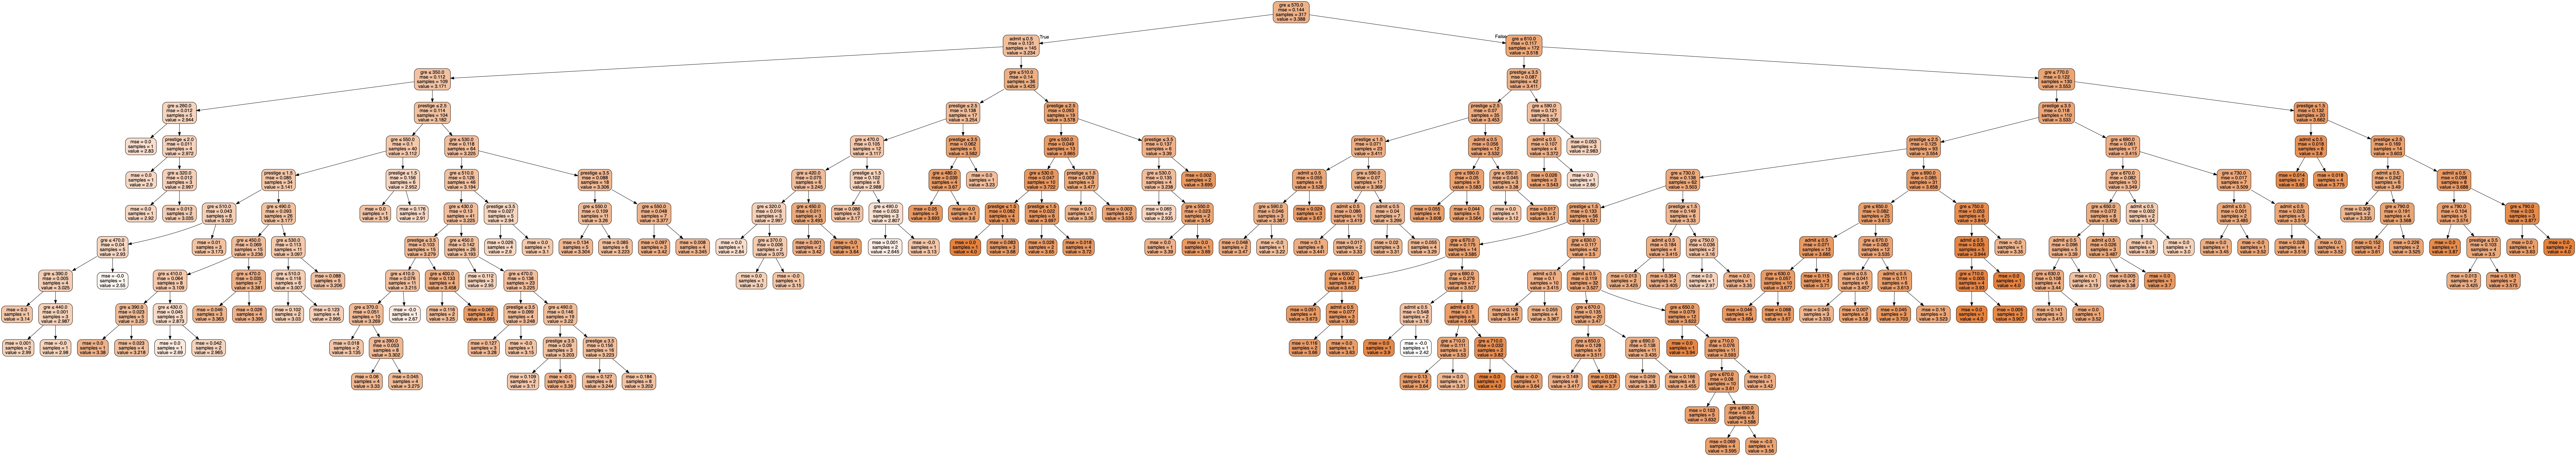

In [96]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

#initialize the output file object
dot_data = StringIO() 

#my fit DecisionTreeRegressor object here is: dtr1
#for feature_names i put the columns of my Xr matrix
export_graphviz(regressorN, out_file=dot_data,  
                filled=True, rounded=True,
                 special_characters=True,
                 feature_names=Xr.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### 7. Building classification trees

With `DecisionTreeClassifier`:

1. Again build 4 models with different parameters for `max_depth`: `max_depth=1`, `max_depth=2`, `max_depth=3`, and `max_depth=None`
2. Cross-validate the accuracy scores of each of the models and compare to the logistic regression earlier.

Note that now you'll be using the classification task where we are predicting `admit`.

In [101]:
from sklearn.tree import DecisionTreeClassifier


In [102]:
classifier1 = DecisionTreeClassifier(criterion='gini',
                                    max_depth=1, 
                                    random_state=1)
classifier1.fit(Xc_train, yc_train)
print(classifier1.score(Xc_train, yc_train))
print(cross_val_score(classifier1, Xc_train, yc_train, cv=5).mean())
print(classifier1.score(Xc_test, yc_test))


0.6813880126182965
0.6814163614163615
0.6875


In [103]:
pd.DataFrame(list(zip(Xc.columns, classifier1.feature_importances_)), 
             columns=['Feature', 'Importance']
            ).sort_values(by='Importance', ascending=False)


Feature  Importance
1           gpa         1.0
0           gre         0.0
2  prestige_2.0         0.0
3  prestige_3.0         0.0
4  prestige_4.0         0.0

In [104]:
classifier2 = DecisionTreeClassifier(criterion='gini',
                                    max_depth=2, 
                                    random_state=1)
classifier2.fit(Xc_train, yc_train)
print(classifier2.score(Xc_train, yc_train))
print(cross_val_score(classifier2, Xc_train, yc_train, cv=5).mean())
print(classifier2.score(Xc_test, yc_test))


0.7129337539432177
0.6276434676434677
0.5875


In [105]:
pd.DataFrame(list(zip(Xc.columns, classifier2.feature_importances_)), 
             columns=['Feature', 'Importance']
            ).sort_values(by='Importance', ascending=False)

Feature  Importance
1           gpa    0.863984
3  prestige_3.0    0.136016
0           gre    0.000000
2  prestige_2.0    0.000000
4  prestige_4.0    0.000000

In [106]:
classifier3 = DecisionTreeClassifier(criterion='gini',
                                    max_depth=3, 
                                    random_state=1)
classifier3.fit(Xc_train, yc_train)
print(classifier3.score(Xc_train, yc_train))
print(cross_val_score(classifier3, Xc_train, yc_train, cv=5).mean())
print(classifier3.score(Xc_test, yc_test))

0.7381703470031545
0.6370695970695971
0.575


In [107]:
pd.DataFrame(list(zip(Xc.columns, classifier3.feature_importances_)), 
             columns=['Feature', 'Importance']
            ).sort_values(by='Importance', ascending=False)

Feature  Importance
1           gpa    0.697656
0           gre    0.210164
3  prestige_3.0    0.092179
2  prestige_2.0    0.000000
4  prestige_4.0    0.000000

In [108]:
classifierN = DecisionTreeClassifier(criterion='gini',
                                    max_depth=None, 
                                    random_state=1)
classifierN.fit(Xc_train, yc_train)
print(classifierN.score(Xc_train, yc_train))
print(cross_val_score(classifierN, Xc_train, yc_train, cv=5).mean())
print(classifierN.score(Xc_test, yc_test))

0.9936908517350158
0.608986568986569
0.6875


In [109]:
pd.DataFrame(list(zip(Xc.columns, classifierN.feature_importances_)), 
             columns=['Feature', 'Importance']
            ).sort_values(by='Importance', ascending=False)

Feature  Importance
1           gpa    0.492298
0           gre    0.384067
3  prestige_3.0    0.044271
4  prestige_4.0    0.040503
2  prestige_2.0    0.038860

In [174]:
1-yc.mean()   # mean of yc

0.6826196473551638

### 8. Visualize the classification trees

The plotting code will be the same as for regression, you just need to change the model you're using for each plot and the feature names.

The output changes somewhat from the regression tree chart. Earlier it would give the MSE of that node, but now there is a line called `value` that tells you the count of each class at that node.

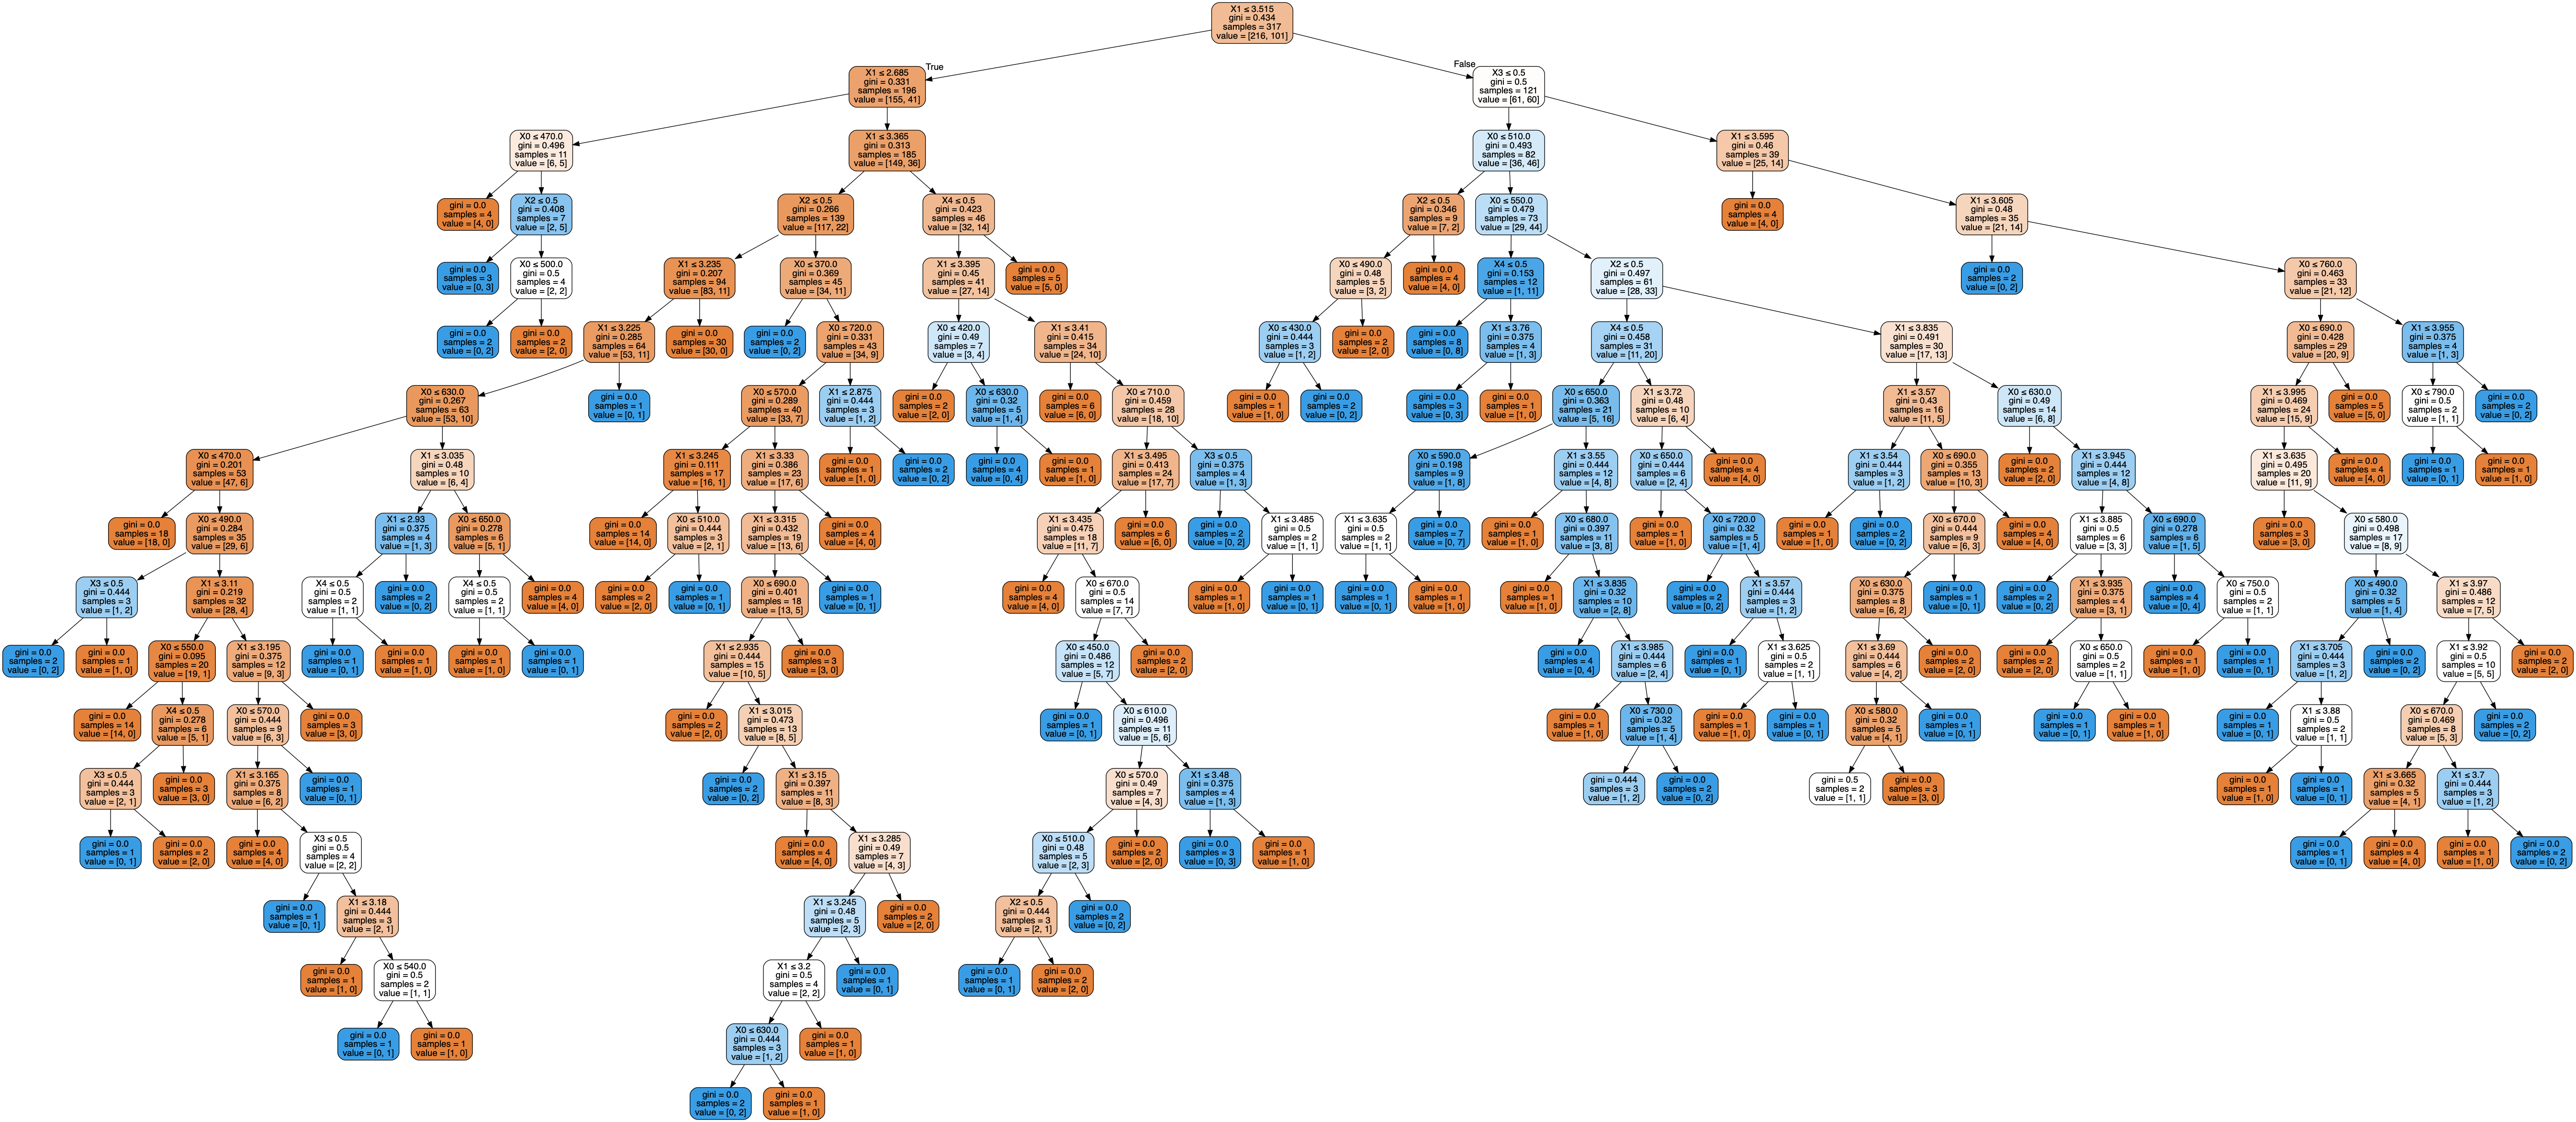

In [110]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifierN,
                out_file=dot_data,
                max_depth=None,
                filled=True,
                rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


### 9. Using GridSearchCV to find the best decision tree classifier

As decision trees that are unrestricted will just end up overfitting the training data, decision tree regression and classification models in sklearn offer a variety of ways to "pre-prune" (by restricting how many times the tree can branch and what it can use).

Measure           | What it does
------------------|-------------
max_depth         | How many nodes deep can the decision tree go?
max_features      | Is there a cutoff to the number of features to use?
max_leaf_nodes    | How many leaves can be generated per tree?
min_samples_leaf  | How many samples need to be included at a leaf, at a minimum?  
min_samples_split | How many samples need to be included at a node, at a minimum?

It is not always best to search over _all_ of these in a grid search, unless you have a small dataset. Many of them while not redundant are going to have very similar effects on your model's fit.

Check out the documentation here:

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

#### Do the grid search for the regression and classification decision tree

In [111]:
from sklearn.model_selection import GridSearchCV

In [115]:
regressor1 = DecisionTreeRegressor(criterion='mse', random_state=1)

In [119]:
classifierN = DecisionTreeClassifier(random_state=1)

In [120]:
param_grid_model = {
                  'max_depth': [1,2,3,4,5,6,None]}

param_grid_classifier = {
                  'max_depth': [1, 2, 3, 4,5, None],
                  'criterion': ['gini', "entropy"]}


In [126]:
gs = GridSearchCV(regressor1,
                  param_grid=param_grid_model 
                  )

In [127]:
gs1 = GridSearchCV(classifierN, param_grid=param_grid_model)

In [128]:
gs.fit(Xr_train, yr_train)
print(gs.score(Xr_train, yr_train))
print(gs.best_score_)
print(gs.score(Xr_test, yr_test))


0.23257266234259188
0.17261815760778393
0.03333213485583442


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [129]:
gs1.fit(Xc_train, yc_train)
print(gs1.score(Xc_train, yc_train))
print(gs1.best_score_)
print(gs1.score(Xc_test, yc_test))


0.7381703470031545
0.6971608832807571
0.575


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [133]:
gs.best_params_


{'max_depth': 3}

In [136]:
gs.cv_results_

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py

{'mean_fit_time': array([0.00205461, 0.00187373, 0.00176072, 0.00166305, 0.00173044,
        0.00177304, 0.00167068]),
 'std_fit_time': array([2.14652148e-04, 1.53334969e-04, 5.91165906e-05, 4.34128452e-06,
        5.37160110e-05, 1.87350419e-05, 5.98635877e-05]),
 'mean_score_time': array([0.00104737, 0.00097466, 0.00092109, 0.00089137, 0.00091283,
        0.00092729, 0.0008533 ]),
 'std_score_time': array([1.01422378e-04, 4.33270696e-05, 1.36007763e-05, 4.82499098e-06,
        3.22646108e-05, 2.48026634e-06, 2.09057432e-05]),
 'param_max_depth': masked_array(data=[1, 2, 3, 4, 5, 6, None],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1},
  {'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': None}],
 'split0_test_score': array([ 0.13484949,  0.1733859 ,  0.18458754,  0.1903995 ,  0.20455538,
         0.22357252, -0.43053307

In [134]:
gs1.best_params_


{'max_depth': 3}

## Switch over to the college stats dataset

We are going to be predicting whether or not a college is public or private. Set up your X, y variables accordingly.

In [137]:
col = pd.read_csv('../../../../resource-datasets/college_stats/College.csv')

In [142]:
col.Private.unique()

array(['Yes', 'No'], dtype=object)

In [143]:
col.head()

Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0   70        78       18.1           12    7041         60  
1   29        30       12.2           16   10527         56  
2   53        66       12.9           30    8735         54  
3   92        97        7.7           37   19016         59  
4   76        72       11.9            2   10922         15

### 10. Set up and run the gridsearch on the data

In [144]:
y = col.pop("Private")

In [145]:
X = col

In [153]:
col.dtypes

Unnamed: 0      object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [157]:
X.head()

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  1660    1232     721         23         52         2885          537   
1  2186    1924     512         16         29         2683         1227   
2  1428    1097     336         22         50         1036           99   
3   417     349     137         60         89          510           63   
4   193     146      55         16         44          249          869   

   Outstate  Room.Board  Books  Personal  PhD  Terminal  S.F.Ratio  \
0      7440        3300    450      2200   70        78       18.1   
1     12280        6450    750      1500   29        30       12.2   
2     11250        3750    400      1165   53        66       12.9   
3     12960        5450    450       875   92        97        7.7   
4      7560        4120    800      1500   76        72       11.9   

   perc.alumni  Expend  Grad.Rate  
0           12    7041         60  
1           16   10527         56  
2           30    8735         54  
3           37   19016         59  
4            2   10922         15

In [158]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

In [159]:
from sklearn.preprocessing import StandardScaler

In [160]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [161]:
classifier = DecisionTreeClassifier(criterion='gini',
                                    max_depth=None, 
                                    random_state=1)
classifier.fit(X_train, y_train)
print(classifier.score(X_train, y_train))
print(cross_val_score(classifier, X_train, y_train, cv=5).mean())
print(classifier.score(X_test, y_test))


1.0
0.8984975609756098
0.9294871794871795


# verbose=1 , iid = False

In [162]:
param_grid_classifier = {
                  'max_depth': [1, 2, 3, 4,5,6,7,8,9,None],
                  'criterion': ['gini', "entropy"]}


In [163]:
classifier = DecisionTreeClassifier(
                                     
                                    random_state=1)

In [164]:
gs2 = GridSearchCV(classifier, param_grid=param_grid_model)

In [165]:
gs2.fit(X_train, y_train)
print(gs2.score(X_train, y_train))
print(gs2.best_score_)
print(gs2.score(X_test, y_test))


0.9565217391304348
0.893719806763285
0.9166666666666666


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [169]:
gs2.best_params_

{'max_depth': 4}

### 11. Print out the "feature importances"

The model has an attribute called `.feature_importances_` which will rank the features according to their importance. The ranking is based on an importance measure ranging from 0 to 1, with 1 being the most important. The importance scores of all features add up to 1.

The score takes into account how many times the feature was used to make a decision, how many data points were involved in each decision and how much the decision increased the purity of the node. A feature with higher feature importance reduced the criterion (impurity) more than the other features.

Below, show the feature importances for each variable predicting private versus not, sorted by most important feature to least.

In [172]:
classifier.fit(X_train, y_train)
print(classifier.score(X_train, y_train))
print(cross_val_score(classifier, X_train, y_train, cv=5).mean())
print(classifier.score(X_test, y_test))


1.0
0.8984975609756098
0.9294871794871795


In [173]:
pd.DataFrame(list(zip(X.columns, classifier.feature_importances_)), 
             columns=['Feature', 'Importance']
            ).sort_values(by='Importance', ascending=False)

Feature  Importance
5   F.Undergrad    0.505153
7      Outstate    0.274926
6   P.Undergrad    0.043656
0          Apps    0.031730
8    Room.Board    0.021399
3     Top10perc    0.020756
11          PhD    0.019887
10     Personal    0.019162
16    Grad.Rate    0.018855
14  perc.alumni    0.015394
12     Terminal    0.015177
9         Books    0.007345
4     Top25perc    0.006558
2        Enroll    0.000000
1        Accept    0.000000
13    S.F.Ratio    0.000000
15       Expend    0.000000